<a href="https://colab.research.google.com/github/Benjamnk/DSE-2/blob/main/inno_Linear_CCS_MPV_2F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ติดตั้ง PyCaret
ติดตั้ง Pycaret ผ่าน pip (Packager Installer for Python) ด้วยวิธีนี้

In [95]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Library ที่จะใช้
* ``pandas`` หรือชอบย่อว่า (pd) เป็น Library ในการจัดการข้อมูลแบบตาราง (หรือเรียกว่า Dataframe) หรือชอบย่อสั้นๆว่า (df)
* ``matplotlib`` ใช้ Plot graph ได้หลากหลายรูปแบบ ต้องเขียนโปรแกรมหลายบรรทัด เหมาะสำหรับ Expert
* ``seaborn`` ใช้ Plot graph ได้หลากหลายรูปแบบ สร้างยอดจาก ``matplotlib`` เขียนไม่กี่บรรทัด ใช้งานง่าย เหมาะสำหรับผู้ใช้ใหม่

In [96]:
# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# ปรับ dpi ของกราฟให้ละเอียดมากพอ ไม่ให้รูปใหญ่เกิน Notebook Colab
mpl.rcParams['figure.dpi'] = 300

In [97]:
df = pd.read_excel("https://github.com/Benjamnk/DSE-2/raw/main/data_mpv.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mill     8 non-null      object 
 1   year     8 non-null      object 
 2   P_pre    8 non-null      float64
 3   P_int    8 non-null      int64  
 4   P_End    8 non-null      float64
 5   M_16     8 non-null      float64
 6   M_710    8 non-null      float64
 7   M11      8 non-null      float64
 8   M12      8 non-null      float64
 9   R_total  8 non-null      float64
 10  ton_1    8 non-null      float64
 11  ton_7    8 non-null      float64
 12  ton_14   8 non-null      float64
 13  ton_21   8 non-null      float64
 14  ton_45   8 non-null      float64
 15  ton_end  8 non-null      float64
 16  ccs_1    8 non-null      float64
 17  ccs_7    8 non-null      float64
 18  ccs_14   8 non-null      float64
 19  ccs_21   8 non-null      float64
 20  ccs_45   8 non-null      float64
 21  ccs_end  8 non-null 

## การแสดงผลข้อมูลให้เต็มที่
โชว์ไม่ครบ ทำไงให้โชว์มากกว่านี้ ใช้ ``display(data)``

In [98]:
display(df)

,Mill,year,P_pre,P_int,P_End,M_16,M_710,M11,M12,R_total,...,ton_14,ton_21,ton_45,ton_end,ccs_1,ccs_7,ccs_14,ccs_21,ccs_45,ccs_end
0,MPV,ปี 2558,958.31,900,854.25,228.170000,505.970000,10.000000,1.500000,745.640000,...,404549.710,638497.390,1380306.930,3593544.360,9.430000,9.905426,10.234839,10.426151,10.720082,12.495660
1,MPV,ปี 2559,854.25,808,881.47,282.694737,632.815789,103.368421,0.000000,1018.878947,...,124957.140,210325.109,536123.274,1342037.000,10.890000,11.294627,11.590000,11.804009,12.428894,13.285907
2,MPV,ปี 2560,881.47,1010,1083.86,530.021053,753.642105,6.052632,8.447368,1298.163158,...,452666.680,693475.065,1393514.795,4283041.511,11.690000,12.089595,12.190000,12.374567,12.730133,13.671575
3,MPV,ปี 2561,1083.86,750,790.62,771.130909,658.482727,43.174545,4.379091,1477.167273,...,443329.240,688021.780,1368722.900,4403346.870,12.000000,12.087290,12.322341,12.445676,12.833271,13.824102
4,MPV,ปี 2562,790.62,700,680.77,514.419899,588.688442,19.177828,0.000000,1122.286170,...,394378.870,633672.350,1249935.960,2003570.060,11.470000,12.117609,12.380839,12.549318,13.002050,13.449636
5,MPV,ปี 2563,680.77,750,833.22,533.461676,1097.475186,7.189729,0.000000,1638.126592,...,219584.430,295733.190,710325.250,2713895.310,11.863059,12.247747,12.572780,12.678430,13.360457,13.818224
6,MPV,ปี 2564,833.22,920,1002.20,333.657474,593.422528,1.360000,0.140000,928.580002,...,257190.215,386415.125,757408.765,1800893.895,11.580000,12.269681,12.440495,12.619134,13.094281,13.594563
7,MPV,ปี 2565,1002.20,1070,1106.40,418.048678,756.555460,45.107845,0.000000,1219.711982,...,242000.000,712500.000,2122500.000,4030000.000,12.280000,12.853278,12.994690,13.110000,13.350000,14.040000


## การเลือก Field มาแสดงผล


## การดูสถิติของข้อมูล
เราสามารถใช้ ``data.info()`` เพื่อดูสถิติของ Dataset ได้

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mill     8 non-null      object 
 1   year     8 non-null      object 
 2   P_pre    8 non-null      float64
 3   P_int    8 non-null      int64  
 4   P_End    8 non-null      float64
 5   M_16     8 non-null      float64
 6   M_710    8 non-null      float64
 7   M11      8 non-null      float64
 8   M12      8 non-null      float64
 9   R_total  8 non-null      float64
 10  ton_1    8 non-null      float64
 11  ton_7    8 non-null      float64
 12  ton_14   8 non-null      float64
 13  ton_21   8 non-null      float64
 14  ton_45   8 non-null      float64
 15  ton_end  8 non-null      float64
 16  ccs_1    8 non-null      float64
 17  ccs_7    8 non-null      float64
 18  ccs_14   8 non-null      float64
 19  ccs_21   8 non-null      float64
 20  ccs_45   8 non-null      float64
 21  ccs_end  8 non-null 

Drop object

In [100]:
# Drop the columns with object data type
object_columns = df.select_dtypes(include='object').columns
df = df.drop(object_columns, axis=1)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   P_pre    8 non-null      float64
 1   P_int    8 non-null      int64  
 2   P_End    8 non-null      float64
 3   M_16     8 non-null      float64
 4   M_710    8 non-null      float64
 5   M11      8 non-null      float64
 6   M12      8 non-null      float64
 7   R_total  8 non-null      float64
 8   ton_1    8 non-null      float64
 9   ton_7    8 non-null      float64
 10  ton_14   8 non-null      float64
 11  ton_21   8 non-null      float64
 12  ton_45   8 non-null      float64
 13  ton_end  8 non-null      float64
 14  ccs_1    8 non-null      float64
 15  ccs_7    8 non-null      float64
 16  ccs_14   8 non-null      float64
 17  ccs_21   8 non-null      float64
 18  ccs_45   8 non-null      float64
 19  ccs_end  8 non-null      float64
dtypes: float64(19), int64(1)
memory usage: 1.4 KB


**EDA** - correlation matrix : เลือก Feature เพื่อสร้าง Model

In [102]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

            P_pre     P_int     P_End      M_16     M_710       M11       M12  \
P_pre    1.000000  0.347754  0.212772  0.204109 -0.489195  0.260024  0.340933   
P_int    0.347754  1.000000  0.944896 -0.349184 -0.070974 -0.123531  0.279162   
P_End    0.212772  0.944896  1.000000 -0.251290  0.123070 -0.061446  0.300181   
M_16     0.204109 -0.349184 -0.251290  1.000000  0.369022 -0.126153  0.455109   
M_710   -0.489195 -0.070974  0.123070  0.369022  1.000000 -0.156864 -0.002857   
M11      0.260024 -0.123531 -0.061446 -0.126153 -0.156864  1.000000 -0.230248   
M12      0.340933  0.279162  0.300181  0.455109 -0.002857 -0.230248  1.000000   
R_total -0.149166 -0.264491 -0.077388  0.817789  0.826084 -0.058205  0.253678   
ton_1   -0.182108 -0.368659 -0.145800  0.224291  0.385561 -0.041110  0.008196   
ton_7    0.405307  0.081256 -0.031983  0.548661 -0.215897 -0.572579  0.761022   
ton_14   0.405591 -0.009440 -0.169497  0.474215 -0.304997 -0.530001  0.691686   
ton_21   0.643696  0.355622 


# correlation matrix heatmap **bold text**

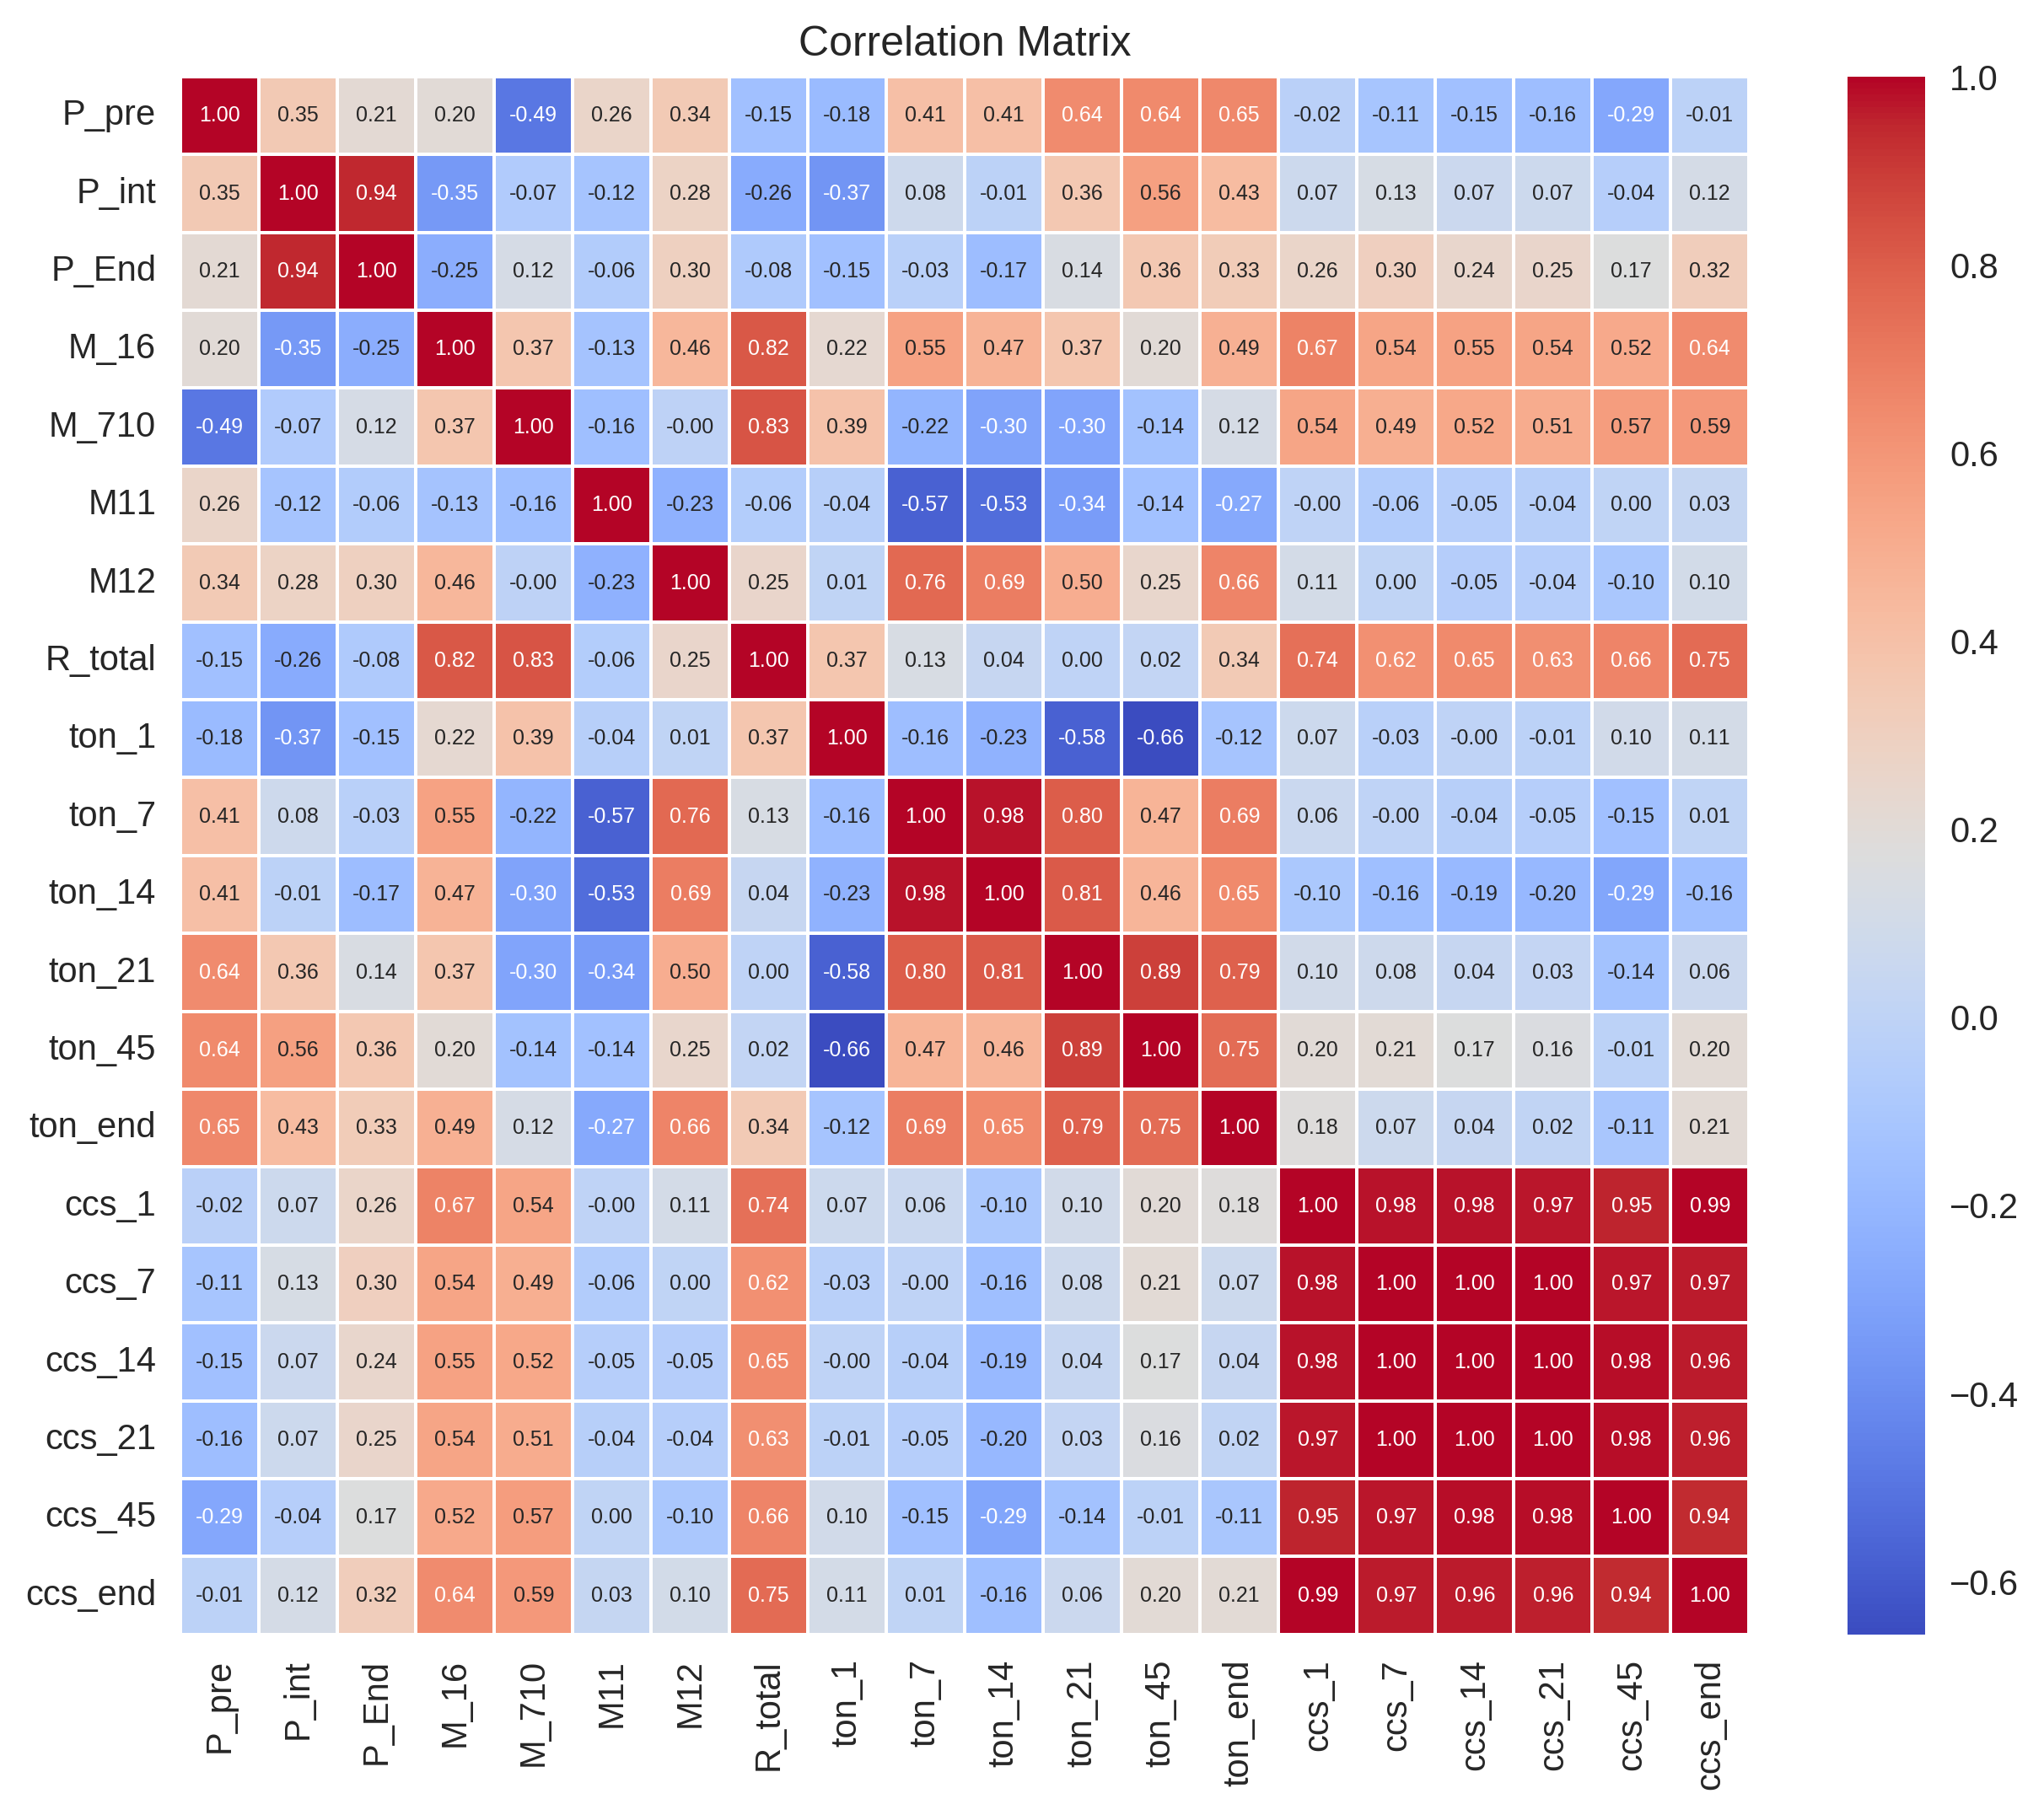

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 6})
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df

,P_pre,P_int,P_End,M_16,M_710,M11,M12,R_total,ton_1,ton_7,ton_14,ton_21,ton_45,ton_end,ccs_1,ccs_7,ccs_14,ccs_21,ccs_45,ccs_end
0,958.31,900,854.25,228.170000,505.970000,10.000000,1.500000,745.640000,8686.21,156458.450,404549.710,638497.390,1380306.930,3593544.360,9.430000,9.905426,10.234839,10.426151,10.720082,12.495660
1,854.25,808,881.47,282.694737,632.815789,103.368421,0.000000,1018.878947,9628.19,52201.555,124957.140,210325.109,536123.274,1342037.000,10.890000,11.294627,11.590000,11.804009,12.428894,13.285907
2,881.47,1010,1083.86,530.021053,753.642105,6.052632,8.447368,1298.163158,8412.79,203672.260,452666.680,693475.065,1393514.795,4283041.511,11.690000,12.089595,12.190000,12.374567,12.730133,13.671575
3,1083.86,750,790.62,771.130909,658.482727,43.174545,4.379091,1477.167273,10926.33,192743.530,443329.240,688021.780,1368722.900,4403346.870,12.000000,12.087290,12.322341,12.445676,12.833271,13.824102
4,790.62,700,680.77,514.419899,588.688442,19.177828,0.000000,1122.286170,6842.49,158198.410,394378.870,633672.350,1249935.960,2003570.060,11.470000,12.117609,12.380839,12.549318,13.002050,13.449636
5,680.77,750,833.22,533.461676,1097.475186,7.189729,0.000000,1638.126592,11515.19,100453.770,219584.430,295733.190,710325.250,2713895.310,11.863059,12.247747,12.572780,12.678430,13.360457,13.818224
6,833.22,920,1002.20,333.657474,593.422528,1.360000,0.140000,928.580002,10601.66,125039.395,257190.215,386415.125,757408.765,1800893.895,11.580000,12.269681,12.440495,12.619134,13.094281,13.594563
7,1002.20,1070,1106.40,418.048678,756.555460,45.107845,0.000000,1219.711982,7000.00,112500.000,242000.000,712500.000,2122500.000,4030000.000,12.280000,12.853278,12.994690,13.110000,13.350000,14.040000


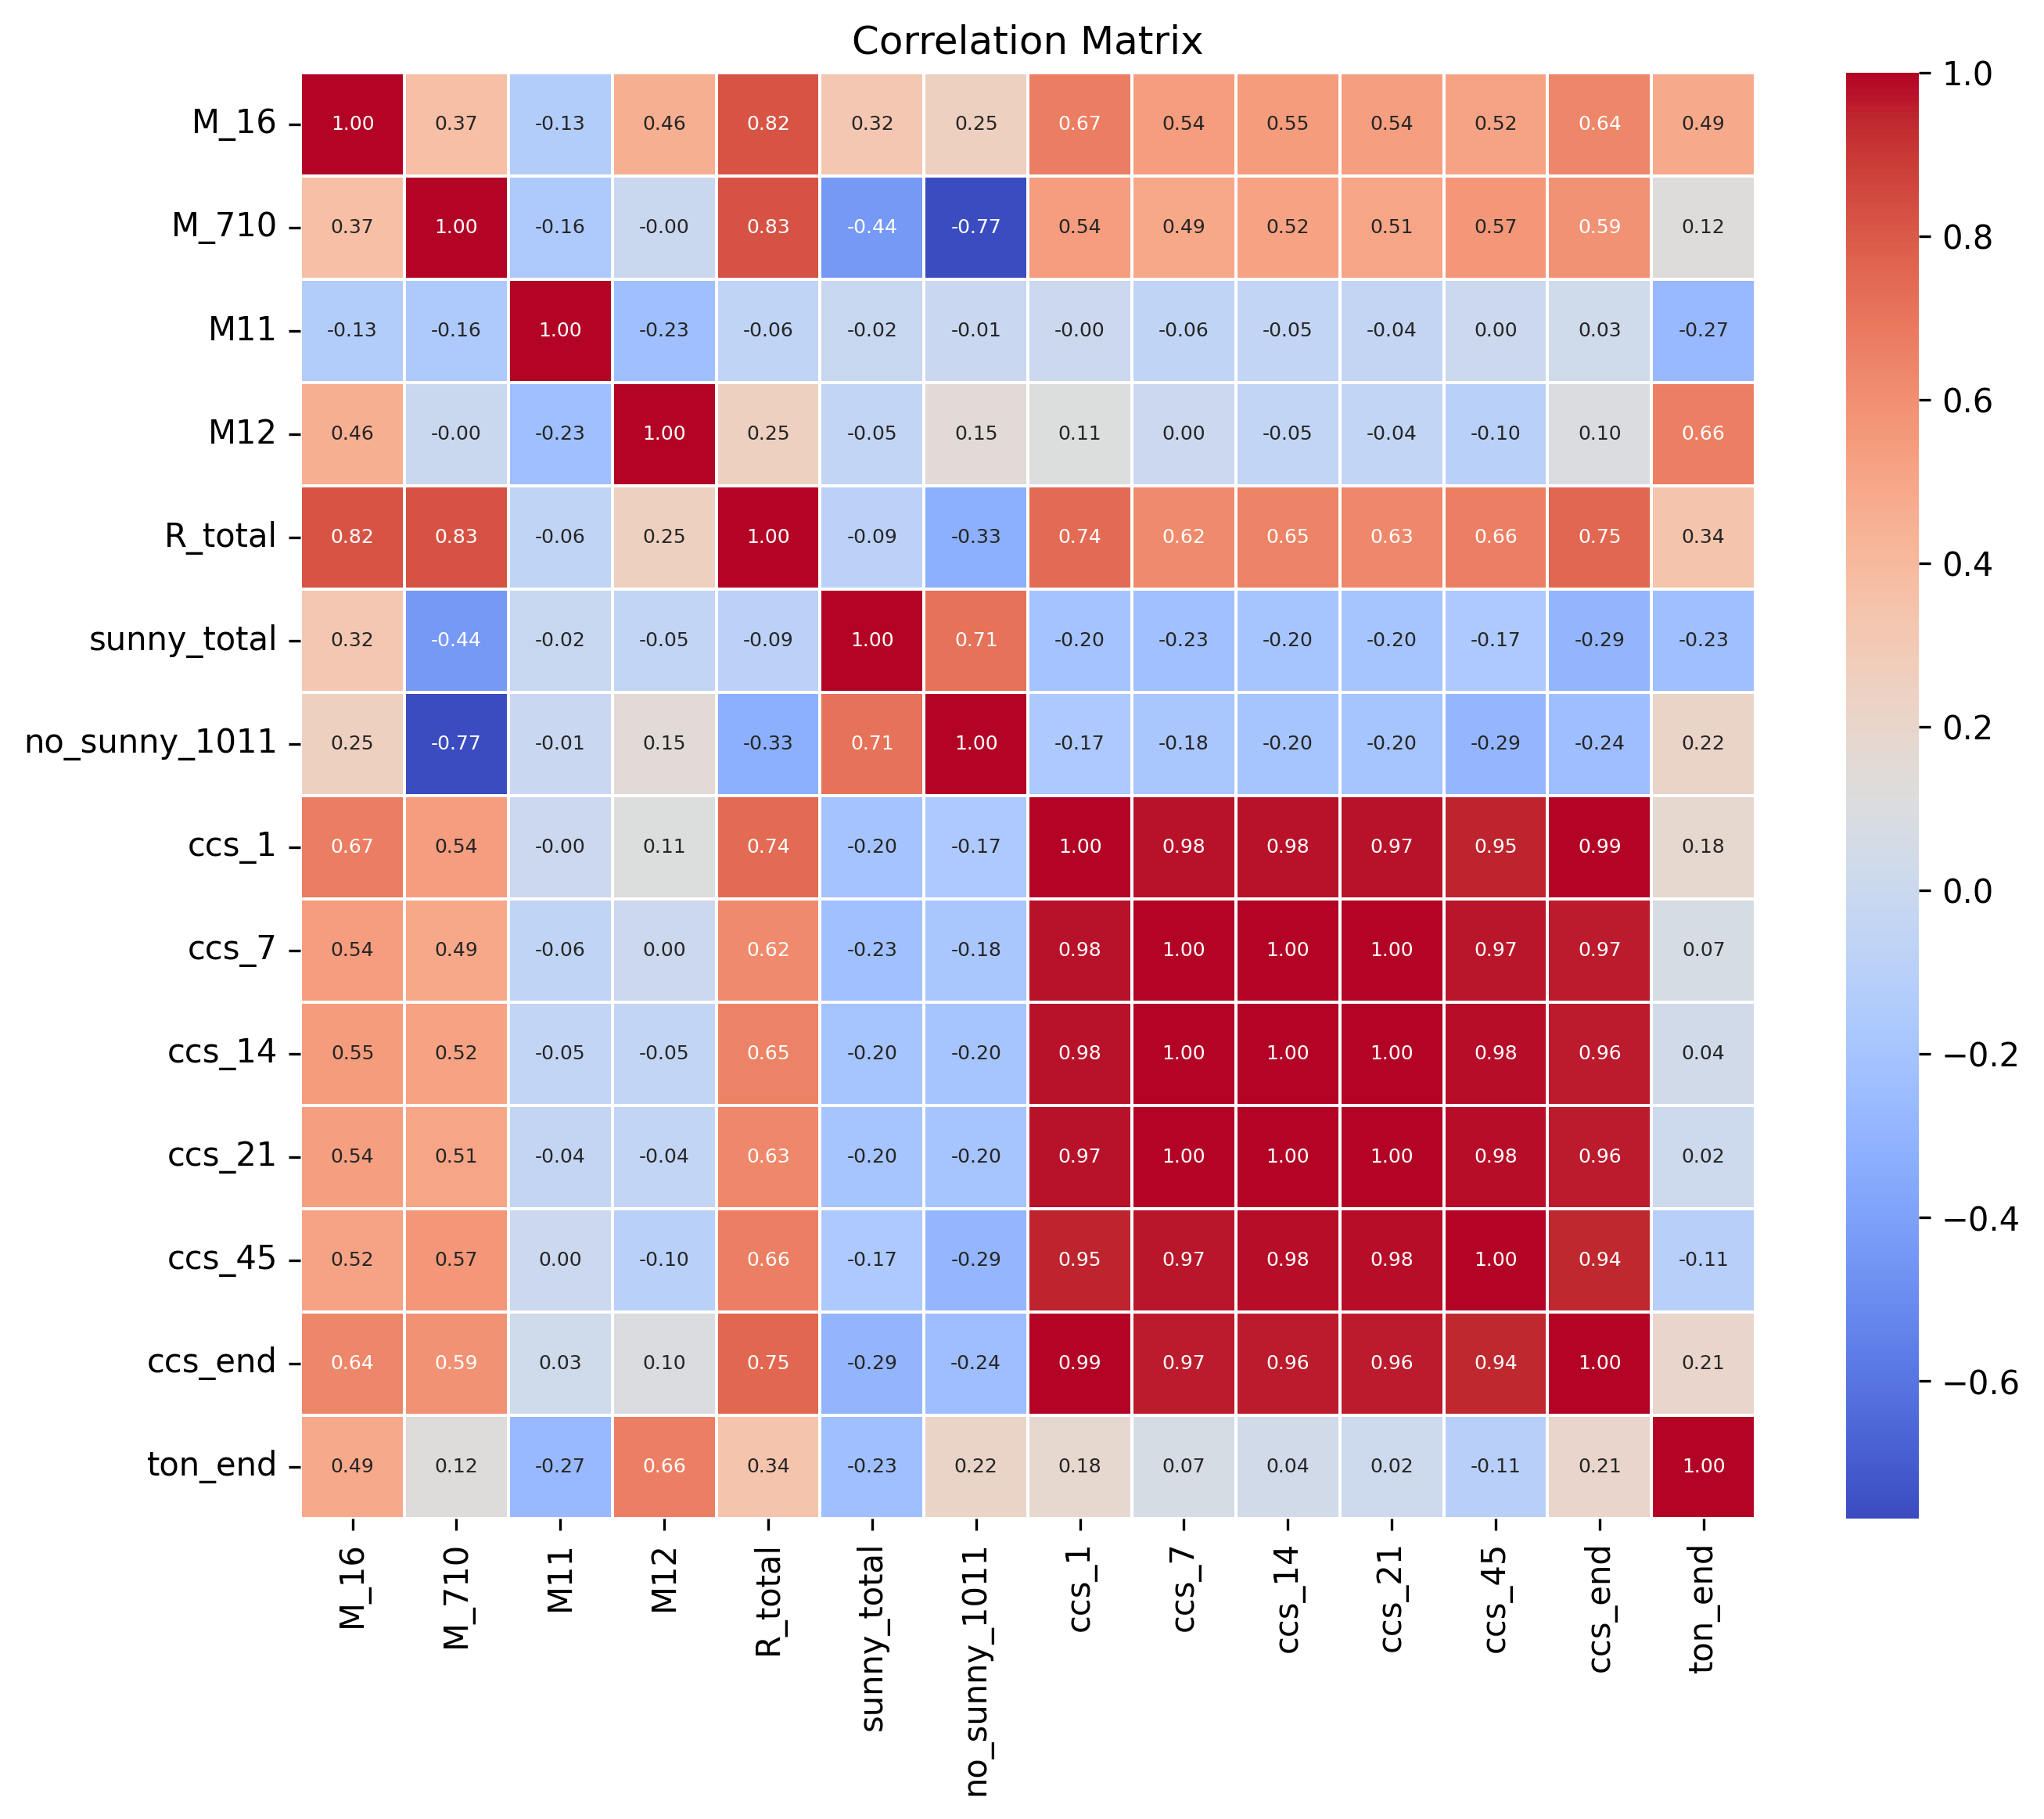

In [10]:
df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 6})
plt.title('Correlation Matrix')
plt.show()


เราสามารถเห็นได้เลยว่าแต่ละ Column มีทั้งหมด 1338 แถว และข้อมูลไม่มีค่า null แทรก

In [91]:
df

,M_16,M_710,M11,M12,R_total,ccs_1
0,228.170000,505.970000,10.000000,1.500000,745.640000,9.430000
1,282.694737,632.815789,103.368421,0.000000,1018.878947,10.890000
2,530.021053,753.642105,6.052632,8.447368,1298.163158,11.690000
3,771.130909,658.482727,43.174545,4.379091,1477.167273,12.000000
4,514.419899,588.688442,19.177828,0.000000,1122.286170,11.470000
5,533.461676,1097.475186,7.189729,0.000000,1638.126592,11.863059
6,333.657474,593.422528,1.360000,0.140000,928.580002,11.580000
7,418.048678,756.555460,45.107845,0.000000,1219.711982,12.280000


# เริ่มต้น Regression
PyCaret การทำงานงั้นค่อนข้างง่าย แบ่งเป็น 3 ขั้นตอนหลักๆดังต่อไปนี้
1. PyCaret Project Setup
2. PyCaret Compare Model/Train Model/Tune Model
3. PyCaret Inference and Export Model

## การทำ PyCaret Model Setup
```
from pycaret.regression import *
setup(data=data, target='charges', train_size = 0.8, session_id = 7402, numeric_features = numeric[:-1], categorical_features = categorical, transformation = True, normalize = True, transform_target = True)
```
1. *data = dataframe ที่เราต้่องการที่จะนำไป Train (จำเป็นต้องใส่)
1. *target = Column เป้าหมาย (y) ที่เราต้่องการให้ Model เรียนรู้และสามารถ Predict ค่า target ได้อย่างแม่นยำ (จำเป็นต้องใส่)
1. train_size = 0.8 แบ่งข้อมูลของ data frame ที่ใส่มาให้ 80% ให้เป็น training set โดยเป็นการ Random หยิบแบบกระจายทั่วทั้ง Dataset มาให้ (Stratified sampling) และนำข้ออีก 20% ที่เหลือเป็น validation set.
1. session_id = เลขประจำ session เป็นเลขอะไรก็ได้ เราสามารถใช้อ้างอิงได้ภายหลัง
1. numeric_features = Numerical feature ที่เราต้องการให้เป็นส่วนนึงของ Input (x)
1. categorical_features = Categorical features ที่เราต้องการให้เป็นส่วนนึงของ Input (x)
1. Transformation = หากข้อมูลไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลให้เป็น Normal Distribution ให้เรา
1. Normalize = ทำการแปลงค่า numeric_features ทั้งหมดให้อยู่ระหว่าง -1..1 โดยใช้หลักการของ z-score = (x - mean) / standard deviation
1. Transform_target = หากข้อมูลเป้าหมาย (y) ไม่เป็น Normal Distribution อาทิเช่นเอนเอียงไปด้านนึง เราควรปรับค่านี้ให้เป็น True ซึ่งระบบจะทำการแปลงข้่อมูลเป้าหมาย (y) ให้เป็น Normal Distribution ให้เรา



**##Setup Model**

In [53]:
from pycaret.regression import *
reg = setup(data=df, target='ccs_1', train_size = 0.75, session_id = 7402, transformation = True, normalize = True, transform_target = False )

,Description,Value
0,Session id,7402
1,Target,ccs_1
2,Target type,Regression
3,Original data shape,"(8, 6)"
4,Transformed data shape,"(8, 6)"
5,Transformed train set shape,"(6, 6)"
6,Transformed test set shape,"(2, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


## Compare Models
เราสามารถใช้่คำสั่ง ``compare_models()`` เพื่อหา Model ที่ดีที่สุดในการทำ Regression
* Model = ชื่อ Model
* MAE = Mean Absolute Error (https://en.wikipedia.org/wiki/Mean_absolute_error) ยิ่งน้อยยิ่งดี
* MSE = Mean Square Error (https://en.wikipedia.org/wiki/Mean_squared_error) ยิ่งน้อยยิ่งดี
* RMSE = Root Mean Square Error (https://en.wikipedia.org/wiki/Root-mean-square_deviation) ยิ่งน้อยยิ่งดี
* R2 = Coefficient of determination (https://en.wikipedia.org/wiki/Coefficient_of_determination) ยิ่งเข้าใกล้ 1 ยิ่งดี
* RMSLE - Root Mean Squared Logaritmic Error (RMSLE) (https://hrngok.github.io/posts/metrics/#:~:text=Root%20Mean%20Squared%20Logaritmic%20Error%20(RMSLE)&text=It%20is%20the%20Root%20Mean,possible%200%20(zero)%20values.) ยิ่งน้อยยิ่งดี
* MAPE - Mean absolute percentage error
 (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) ยิ่งน้อยยิ้งดี
* TT - Time Taken (Sec) เวลาในการใช้

In [57]:
best = compare_models(fold=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.5704,0.6731,0.6923,0.1681,0.0585,0.0548,0.1667
xgboost,Extreme Gradient Boosting,0.6282,0.6011,0.7266,-0.1325,0.0628,0.0594,0.1133
rf,Random Forest Regressor,0.6862,0.8528,0.8313,-0.4842,0.0698,0.0651,0.2333
ridge,Ridge Regression,0.7041,0.8730,0.8894,-0.8674,0.0679,0.0606,0.0867
dt,Decision Tree Regressor,0.7762,1.0917,0.9574,-0.9237,0.0797,0.0746,0.0933
et,Extra Trees Regressor,0.8064,0.9955,0.9572,-1.2985,0.0802,0.0746,0.2233
br,Bayesian Ridge,0.9535,1.4082,1.0919,-1.4049,0.0830,0.0837,0.1667
huber,Huber Regressor,0.9535,1.4082,1.0919,-1.4049,0.0830,0.0837,0.2067
lr,Linear Regression,0.9535,1.4082,1.0919,-1.4049,0.0830,0.0837,1.1433
par,Passive Aggressive Regressor,1.0396,1.8048,1.1805,-1.5677,0.0905,0.0925,0.1500


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Plot Model
เราสามารถ Plot กราฟต่างๆของ Model ได้ด้วย ``plot_model({model}, plot='{ประเภทกราฟที่จะ Plot}', scale=1)`` โดยเราสามารถเลือกได้ดังนี้

1. ‘pipeline’ - Schematic drawing of the preprocessing pipeline
1. ‘residuals_interactive’ - Interactive Residual plots
1. ‘residuals’ - Residuals Plot (Default Value)
1. ‘error’ - Prediction Error Plot
1. ‘cooks’ - Cooks Distance Plot
1. ‘rfe’ - Recursive Feat. Selection
1. ‘learning’ - Learning Curve
1. ‘vc’ - Validation Curve
1. ‘manifold’ - Manifold Learning
1. ‘feature’ - Feature Importance
1. ‘feature_all’ - Feature Importance (All)
1. ‘parameter’ - Model Hyperparameter
1. ‘tree’ - Decision Tree

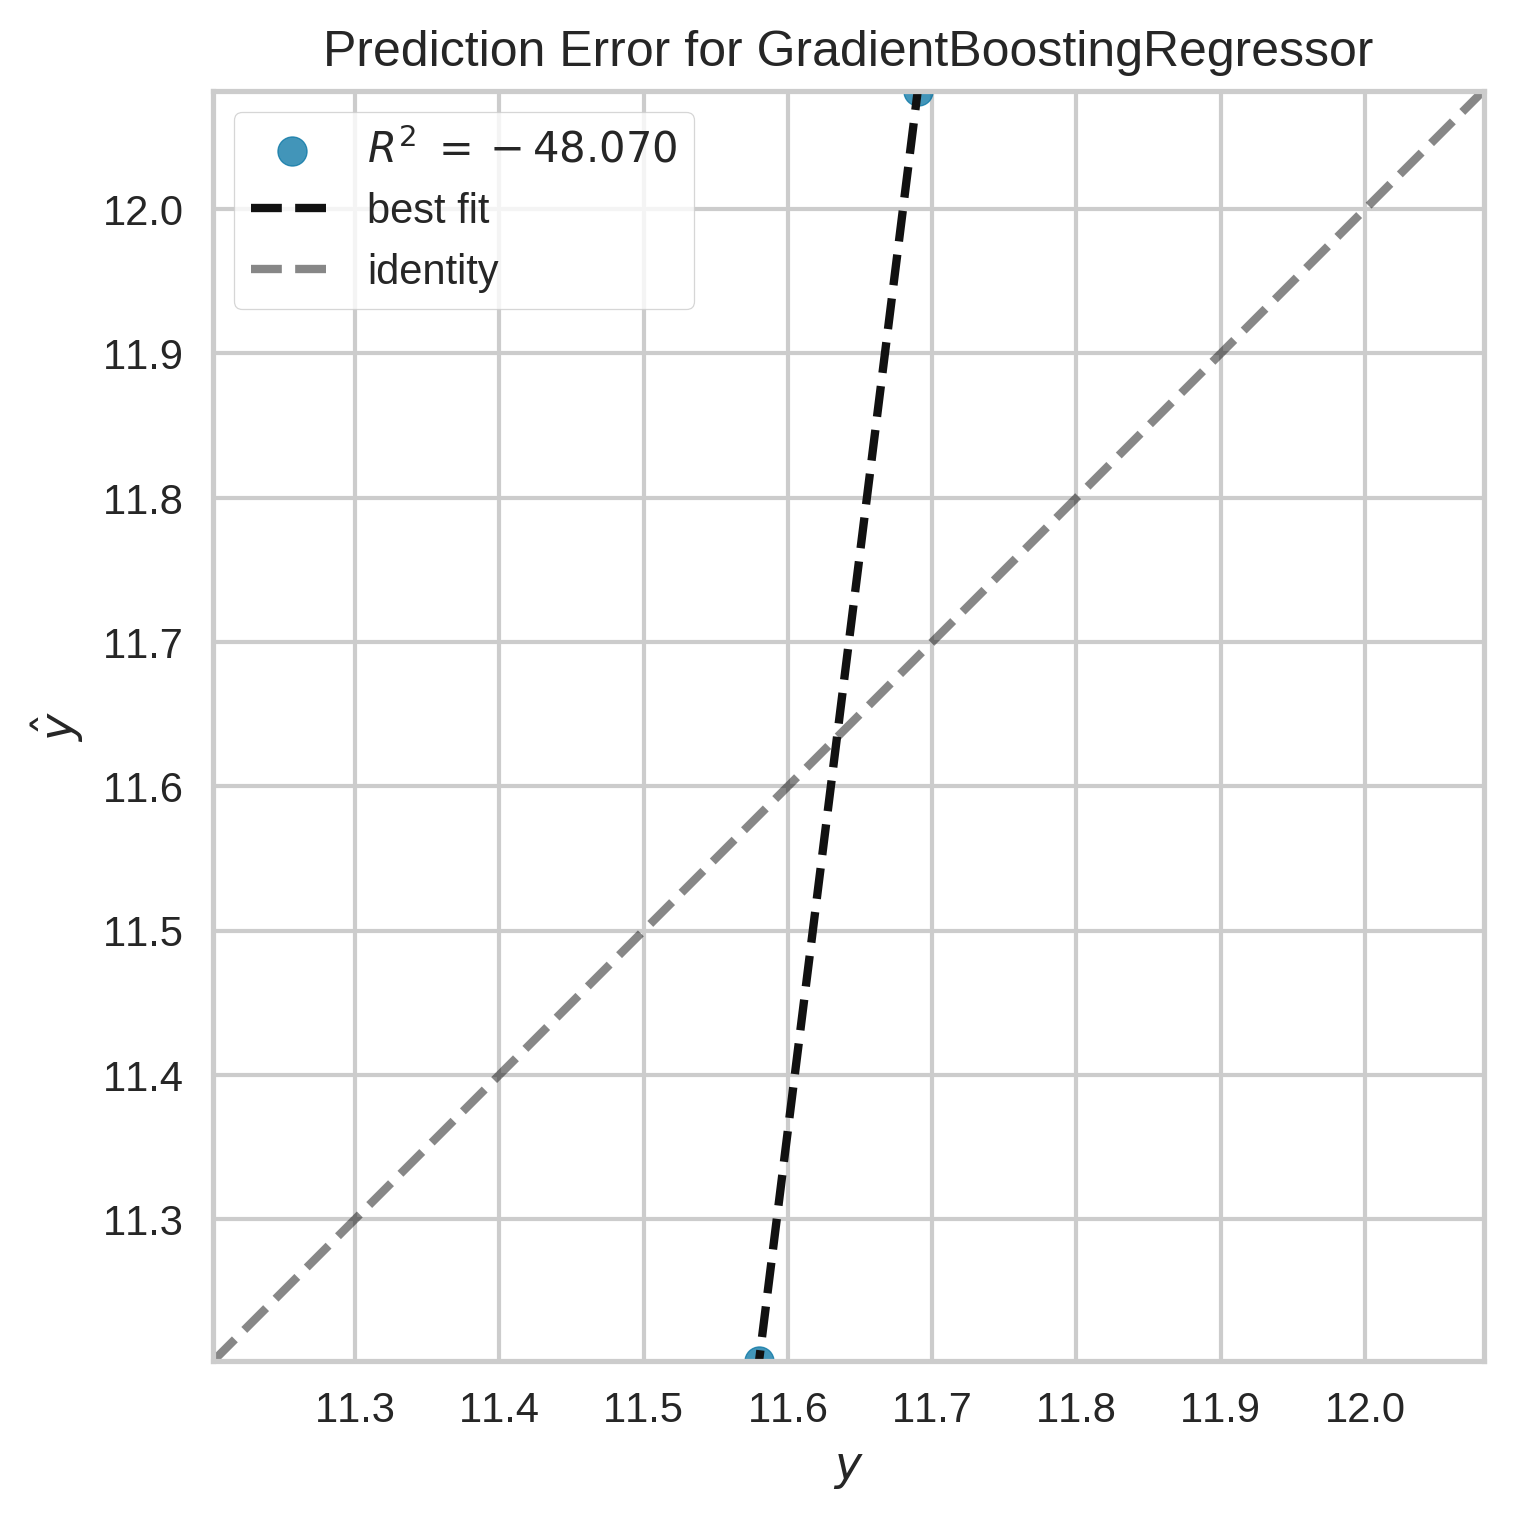

In [58]:
plot_model(best, plot="error", scale=1)

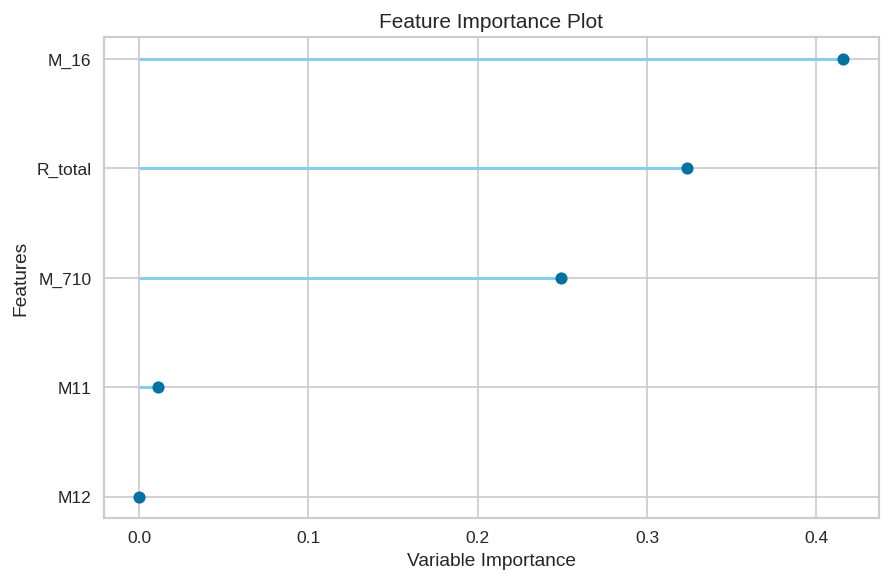

In [59]:
plot_model(best, plot='feature', scale=1.25)

หรือดูทั้งหมดทีเดียวด้วย ``evaluate_model(model)``

In [60]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Create a Model (สร้าง Model)
ต่อจากนี้เราจะเรียนรู้วิธีการ Train AI Model Regression จากรายการ Model ที่ PyCaret เตรียมไว้ให้ ซึ่งมีดังต่อไปนี้
  * 'lr' - Linear Regression
  * 'lasso' - Lasso Regression
  * 'ridge' - Ridge Regression
  * 'en' - Elastic Net
  * 'lar' - Least Angle Regression
  * 'llar' - Lasso Least Angle Regression
  * 'omp' - Orthogonal Matching Pursuit
  * 'br' - Bayesian Ridge
  * 'ard' - Automatic Relevance Determination
  * 'par' - Passive Aggressive Regressor
  * 'ransac' - Random Sample Consensus
  * 'tr' - TheilSen Regressor
  * 'huber' - Huber Regressor
  * 'kr' - Kernel Ridge
  * 'svm' - Support Vector Regression
  * 'knn' - K Neighbors Regressor
  * 'dt' - Decision Tree Regressor
  * 'rf' - Random Forest Regressor
  * 'et' - Extra Trees Regressor
  * 'ada' - AdaBoost Regressor
  * 'gbr' - Gradient Boosting Regressor
  * 'mlp' - MLP Regressor
  * 'xgboost' - Extreme Gradient Boosting
  * 'lightgbm' - Light Gradient Boosting Machine
  * 'catboost' - CatBoost Regressor

โดยการสร้าง Model ทำได้โดยคำสั่งต่อไปนี้
``create_model({Model_Name}, fold=10)``
* Model Name ข้างต้น
* Fold คือจำนวน Fold Cross Validation ส่วนมากจะเป็นค่า 10 Folds แต่ถ้าหากรีบสามารถลดลงมาได้

สมมุตืว่าจะตาราง เราเห็นว่า Model ที่ดีที่สุด ถึงสร้่างมาแล้วด้วยโมเดล Random Forest Regressor (rf) (ซึ่งอยู่ใน Parameter ``best`` ที่คืนมาจาก ``compare_model()``) แต่เป็นโมเดลที่ใช้เวลาคำนวณใช้เวลาเยอะ ใช้เวลามากกว่าเจ้าอื่นๆถึง 2 เท่า เราอยากจะลอง Train Model ตัวที่ 2 รองลงมา ชื่อ ``Gradient Boosting Regressor (GBR)`` ซึ่งประมวลผลได้เร็วกว่า และค่อนข้างได้โมเดลที่มีประสิทธิภาพและเสถียร (Gradient Boosting มีชื่อเสียงด้านนี้) เราจะลองสร้าง model นี้กัน และ tune model ให้ดีที่สุด


In [74]:
# สร้าง Model
model = create_model('xgboost', fold = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4050,0.1642,0.4052,-0.0009,0.0315,0.0341
1,0.9329,1.1378,1.0667,0.2312,0.0948,0.0944
2,0.5466,0.5014,0.7081,-0.6277,0.0621,0.0498
Mean,0.6282,0.6011,0.7266,-0.1325,0.0628,0.0594
Std,0.2231,0.4037,0.2704,0.3628,0.0258,0.0255


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ค่า RMSE เป็นค่าที่นักวิจัยส่วนใหญ่ยอมรับ หลังจากที่เราลองสร้าง Model แล้ว ได้ค่า **4795** ยิ่งน้อยยิ่งดี

Ten-fold cross validation เป็นการแบ่ง Dataset ทั้งหมด เป็น 10 ส่วน โดยแต่ละรอบจะเอา ส่วนแรกเป็น Validation set และส่วนที่เหลือเป็น Training set และไล่เปลี่ยน Validation set ไปเรื่อยๆ ในรอบถัดๆไปดังภาพ
![](https://www.researchgate.net/profile/Mingchao-Li/publication/331209203/figure/fig2/AS:728070977748994@1550597056956/K-fold-cross-validation-method.png)

ค่าความแม่นยำโดยเฉ​ลี่ยของทั้ง 10 รอบจะถูกนำมาใช้่เป็นเกณฑ์ประสิทธิภาพความแม่นยำของโมเดล


### ในรูปบอก Test Set ทำไม Dr.Sea บอกเป็น Validation set???

ที่ผมเรียกว่า Test data ในรูปเป็น Validation data เพราะผมใช้คำศัพท์ตามมาตราฐาน ISO/IEC 23053:2022
Framework for Artificial Intelligence (AI) Systems Using Machine Learning (ML) ครับ (https://www.iso.org/standard/74438.html)


โดยตามหลักมาตรฐาน ISO แล้ว Dataset ต้องแบ่งเป็น 4 ส่วนดังนี้

1. Training set = Data ที่ให้ AI Model Learn เพื่อปรับ Weight (AI เห็น Data เต็มๆ)
1. Validation set = Data ที่ให้ AI Model ทดสอบความแม่นยำจากการ Training เพื่อปรับหา Hyperparameters ที่ดีที่สุด (AI ไม่เห็น data ตรงๆ แต่ได้ถูกใช้เพื่อปรับจูน เพื่อให้ได้ผลความแม่นยำที่ดีที่สุด เพราะฉะนั้นจะถือว่าเป็น Data ที่ไม่เคยเห็นมาก่อน (Unseen) เลยก็ไม่ได้) **คนหลายคนชอบใช้ Dataset นี้เป็น Test Set และ Report ประสิทธิภาพของโมเดล แต่จริงๆห้ามใช้นะครับ**
1. Test set = Data ที่ให้ AI Model ทดสอบความแม่นยำ กับข้อมูลที่ไม่เคยเห็นมาก่อนจริงๆ **และใช้ Data ชุดนี้แจ้งประสิทธิภาพแก่บุคคลอื่นๆได้**
1. Production Test set = Data  ที่ให้ AI Model ทดสอบความแม่นยำ กับข้อมูลที่ไม่เคยเห็นมาก่อนจริงๆ ที่มีการใช้่งานจริงบน Production จากลูกค้า แต่ไม่ใช้มาจากนักพัฒนา

## ลองใช้ Model ของที่เราสร้าง
เราสามารถใช้ ``predict_model({model})`` เพื่อทดสอบเอา Validation set ของ Model Setup ที่เราเตรียมไว้ เข้ามาลอง Inference model ดูว่าผลและมีความแม่นยำมากแค่ไหน

In [75]:
predictions = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.4541,0.2849,0.5338,-93.1953,0.0436,0.0391


ข้างล่างคือ ดูผลการ inference model บนข้อมูล validation set


In [76]:
predictions

,M_16,M_710,M11,M12,R_total,ccs_1,prediction_label
2,530.021057,753.642090,6.052631,8.447369,1298.163208,11.69,11.863487
6,333.657471,593.422546,1.360000,0.140000,928.580017,11.58,10.845303


เพื่อง่ายต่อการดูผล การ inference model บนข้อมูล validation set ที่เลือกเฉพาะบาง cols ให้เห็นง่าย

* Label คือสิ่งที่โมเดลทำการ predict ออกมา
* charges คือตัวแปรเป้าหมาย (y) หรือ เฉลย

In [80]:
cols = ['M_16', 'M_710', 'M11', 'M12', 'ccs_1','R_total', 'ccs_1', 'prediction_label']
predictions[cols]

,M_16,M_710,M11,M12,ccs_1,R_total,ccs_1,prediction_label
2,530.021057,753.642090,6.052631,8.447369,11.69,1298.163208,11.69,11.863487
6,333.657471,593.422546,1.360000,0.140000,11.58,928.580017,11.58,10.845303


# ลองกับข้อมูลของเราเองกันเถอะ
เราสามารถใช้ ``predict_model({model}, data={unseen_dataframe})`` เพื่อทดลองกับ Model ที่เรา Train ได้

สร้าง dataframe ที่มีตัวแปรตรงกันกับข้อมูล insurance

In [68]:
df.head(3)

,M_16,M_710,M11,M12,R_total,ccs_1
0,228.170000,505.970000,10.000000,1.500000,745.640000,9.43
1,282.694737,632.815789,103.368421,0.000000,1018.878947,10.89
2,530.021053,753.642105,6.052632,8.447368,1298.163158,11.69


In [70]:
df.tail(3)

,M_16,M_710,M11,M12,R_total,ccs_1
5,533.461676,1097.475186,7.189729,0.00,1638.126592,11.863059
6,333.657474,593.422528,1.360000,0.14,928.580002,11.580000
7,418.048678,756.555460,45.107845,0.00,1219.711982,12.280000


เราแก้ไขเองข้างล่างได้เลยที่ variable ``unseen``

# ใช้โมเดลพยากรณ์กับข้อมูลใหม่ Unseen data
สร้าง dataframe ที่มีตัวแปรตรงกันกับข้อมูลที่ทำนายผล

In [87]:
unseen = {
    'M_16':[400,450,300],
    'M_710':[700,800,400],
    "M11":[10,20,5],
    "M12":[0,10,0],
    "R_total":[1110,1280,705]}
unseen_df = pd.DataFrame(unseen) # D,F ตัวใหญ่เสมอ

In [88]:
unseen_df

,M_16,M_710,M11,M12,R_total
0,400,700,10,0,1110
1,450,800,20,10,1280
2,300,400,5,0,705


#โมเดลพยากรณ์กับข้อมูลใหม่ Unseen data เป็นค่าพยากรณ์

In [89]:
predict_model(model, data=unseen_df)

,M_16,M_710,M11,M12,R_total,prediction_label
0,400,700,10,0,1110,11.933794
1,450,800,20,10,1280,11.946293
2,300,400,5,0,705,10.845303


## ทำให้ Model ดีขึ้นอีกด้วยการปรับจูนโมเดล (Model Tuning) ด้วยการหา Hyperparameters ที่ดีที่สุด

โมเดล GBR เป็นโมเดลที่มี Hyperparameters อยู่หลากหลายตัว การปรับ Hyperparameters จะทำให้เราสามารถสร้างโมเดลได้ดีขึ้น (คิดถึง Learning Rate ใน Google Sheet ของ Graident Descent) ซึ่งตัว PyCaret อยากที่ทราบกันสร้าง Library ขึ้นมาเพื่อให้เป็น low code เพื่อให้เราสามารถ train AI ได้โดยง่าย แต่อย่างไรก็ตาม ทุกๆ Model ของ PyCaret ไปรับมาจาก Scikit-Learn package ซึ่งจะมีข้อมูลของแต่ละ Model ต่างๆโดยละเอียด ดูได้ที่ อาทิเช่น GBR ก็จะอยู่ที่ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

ส่วนโมเดลอื่นๆ ก็สามารถ Google เอาได้เลย โดยมี Keyword ``scikit-learn randomforest regressor`` เป็นต้น

ระบบจะทำการปรับค่า Hyperparamter ไล่ไปเรื่อยๆ แบบ random เพื่อหาว่าค่าไหนดีที่สุด โดยเราสามารถกำหนด ค่าที่จะทำการทดลองได้ใน ``params`` ดังข้างล่าง

* model = model ทืี่เราใช้ tune
* optimize = ค่า Optimizor ที่เราใช้วัดว่า Setting ไหนดีที่สุด
* tuner_verbose = แสดงให้เห็นในแต่ละ Step หรือไม่
* n_iter = จำนวน Setting candidates ที่เราสร้างขึ้นมาเพื่อหา
* fold = ใช้ผลจาก ten-fold cross validation โดยการสลับการ training และ validation กัน 10 ครั้ง แล้วหาค่าเฉลี่ย

ใช้เวลาค่อนข้างนาน (3 นาที)

In [94]:
params = {'learning_rate': [0.01, 0.02, 0.05],
        'max_depth': [1,2, 3, 4, 5, 6, 7, 8],
        'subsample': [0.4, 0.5, 0.6, 0.7, 0.8],
        'n_estimators' : [100, 200, 300, 400, 500, 600]}
tuned_model = tune_model(model, optimize = 'RMSE',tuner_verbose=True, fold = 10,
                       custom_grid = params, n_iter = 20)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:22:11
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


ValueError: ignored

จากที่เห็นข้างต้น ค่า RMSE ดีขึ้น ตอนนี้มีค่า **4673** ลดลงประมาณ 100

## ลองใช้ Tuned Model ที่ดีขึ้น
ลองกับ Validation set แล้วปรากฏว่าดีขึ้นประมาณ RMSE 100 กว่าๆเช่นกัน

In [ ]:
tuned_predictions = predict_model(tuned_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.regression.oop.RegressionExperiment object at 0x7f8dd6830190>, estimator=GradientBoostingRegressor(learning_rate=0.05, max_depth=2, random_state=7402,
                          subsample=0.5), probability_threshold=None, encoded_labels=False, raw_score=False, drift_report=False, round=4, verbose=True, ml_usecase=None, preprocess=True, replace_labels_in_column=<function _SupervisedExperiment.predict_model.<locals>.replace_labels_in_column at 0x7f8dd66aed40>)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2589.5290,17688784.9189,4205.8037,0.8865,0.4437,0.3706


## พัฒนาให้ดีกว่านี้อีก
การพัฒนาโมเดลให้ดีกว่านี้อีก สามารถทำได้โดยดูรายการ Error ที่โมเดลทำงานผิดพลาด ใช้ ``plot_model(tuned_model, 'error')`` เพื่อดูว่าพลาดตรงไหนบ้่าง หรือบางทีเราอยากเข้าใจว่า Feature อะไรสำคัญที่สุดต่อ Model ใช้ ``plot_model(tuned_model, 'feature', scale=2)`` เพื่อดูข้่อมูล

In [ ]:
plot_model(tuned_model, 'error', scale=2)

In [ ]:
plot_model(tuned_model, 'feature', scale=2)

## บันทึก Model ที่เรา Train และนำไปใช้จริง

เมื่อเราได้ Model ที่พร้อมแล้ว เราสามารถทำ ``finalize_model({Model})`` **เพื่อทำการ Train Model บน Dataset ทั้่งหมด (ALL) ใหม่** เพื่อให้โมเดลได้เรียนรู้บน Data ให้ได้มากที่สุดบนรูปแบบ Estimator (Model) และ Hyperparamters ที่เราได้เลือกและได้กำหนดค่าไว้ในตัวแปร {Model}

In [ ]:
final_model = finalize_model(tuned_model)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.regression.oop.RegressionExperiment object at 0x7f8dd6830190>, estimator=GradientBoostingRegressor(learning_rate=0.05, max_depth=2, random_state=7402,
                          subsample=0.5), fit_kwargs=None, groups=None, model_only=False, experiment_custom_tags=None)
INFO:logs:Finalizing GradientBoostingRegressor(learning_rate=0.05, max_depth=2, random_state=7402,
                          subsample=0.5)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.regression.oop.RegressionExperiment object at 0x7f8dd6830190>, estimator=GradientBoostingRegressor(learning_rate=0.05, max_depth=2, random_state=7402,
                          subsample=0.5), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None, model

## บันทึก Finalize Model เป็นไฟล์
``save_model({Model}, "ชื่อไฟล์")``

In [ ]:
save_model(final_model, 'insurance_fined_tune_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['smoker', 'sex', 'region'],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['smoker', 's...
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transforme

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['smoker', 'sex', 'region'],
                                     transformer=SimpleImputer(fill_value='constant',
                                                               strategy='constant'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['smoker', 's...
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=VarianceThreshold(threshold=0))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual

บันทึก Model ลงชื่อไฟล์ insurance_fined_tune_model.pkl สามารถไปดูได้ที่ Folder Windows ด้านซ้าย

## วิธีการโหลด Model ไปใช้
ใช้คำสั่ง ``load_model({PATH})``

In [ ]:
loaded_model = load_model('insurance_fined_tune_model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=insurance_fined_tune_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


แล้วนำไป predict_model ได้เลย

In [ ]:
result = predict_model(loaded_model, data=unseen_df)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.regression.oop.RegressionExperiment object at 0x7f8dd6830190>, estimator=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['smoker', 'sex', 'region'],
                                    transformer=SimpleImputer(fill_value='constant',
                                                              strategy='constant'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['smoker', 's...
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransf

INFO:logs:Set up data.


In [ ]:
result

,Unnamed: 0,Unnamed: 0.1,age,sex,bmi,children,smoker,region_northeast,region_southwest,region_southeast,region_northwest,Label
0,-2.158462,-2.158462,-3.757258,-1.010519,-0.923963,-1.074893,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,4761.785286
1,-2.146062,-2.146062,3.059822,0.989591,0.428603,1.876949,1.970587,-0.565267,-0.566418,1.635795,-0.566418,51017.621360


# Questions?